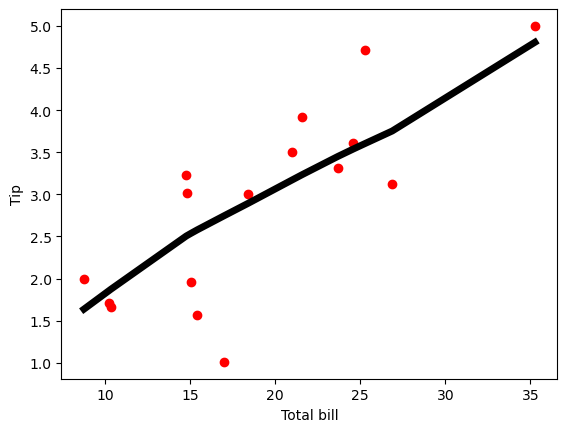

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=diff*diff.T/(-2.0*k**2)
    return weights
def lw(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def lwr(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for j in range(m):
        ypred[j]=xmat[j]*lw(xmat[j],xmat,ymat,k)
    return ypred
def plotGraph(X,ypred):
    si=X[:,1].argsort(0)
    xsort=X[si][:,0]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color='red')
    ax.plot(xsort[:,1],ypred[si],color='black',linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
data=pd.read_csv('data10.csv')
tip = np.array(data.tip)
bill = np.array(data.total_bill) 
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
# increase k to get smooth curves
# ypred = lwr(X,mtip,9)
ypred = lwr(X,mtip,3)
plotGraph(X,ypred)
